In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from sys import stdout

from helpers import *
from data_preprocessing import *
from model import *

In [2]:
# prep_data()

In [2]:
DATA_FOLDER = "../data/processed/"

INPUT_LAB = DATA_FOLDER + "data_lab.csv"
INPUT_AMB = DATA_FOLDER + "data_amb.csv"
WAVENB = "../data/raw/wavenumbers_2_zerofilling.txt"

data_lab, data_amb = load_data(INPUT_LAB, INPUT_AMB)
data_lab_train, data_lab_test, data_amb_train, data_amb_test = split_data(data_lab, data_amb)
wavenb = pd.read_csv(WAVENB, header=None).drop(2784)

In [3]:
# Model parameters :

model_type = 'PCA'

n_comp = 10
components = np.arange(2, n_comp, 1)
alphas = np.logspace(-6, 2, n_comp)
parameters = alphas

venetian_blinds = True
nb_folds = 5

transductive = True
training_amb = True

Ambient error : 7.419e+00
Laboratory error : 4.366e+00


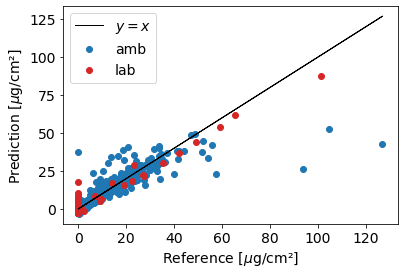

Ambient error : 7.511e+00
Laboratory error : 4.390e+00


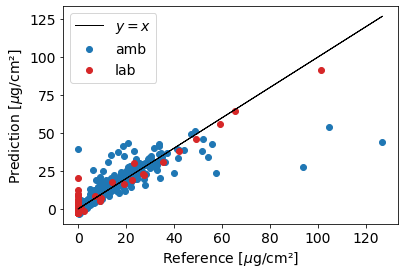

In [5]:
model3 = Model(data_lab_train, data_lab_test, data_amb_train, data_amb_test, 'PCA', \
             venetian_blinds, nb_folds, True, True)
model4 = Model(data_lab_train, data_lab_test, data_amb_train, data_amb_test, 'PCA', \
             venetian_blinds, nb_folds, True, False)

alpha = 0.5
fig_pred, rmse_amb, rmse_lab = model3.print_prediction(alpha)
fig_pred, rmse_amb, rmse_lab = model4.print_prediction(alpha)

In [6]:
q3 = model3.model[1].coef_
q3 = q3.reshape((1, len(q3)))
q4 = model4.model[1].coef_
q4 = q4.reshape((1, len(q4)))

s3 = model3.model[0].explained_variance_
s4 = model4.model[0].explained_variance_

C3 = model3.model[0].components_.T
C4 = model4.model[0].components_.T

P3 = C3*np.sqrt(s3)
P4 = C4*np.sqrt(s4)

b3 = np.linalg.inv(P3.dot(P3.T)).dot(P3).dot(q3.T)
b4 = np.linalg.inv(P4.dot(P4.T)).dot(P4).dot(q4.T)

In [7]:
# Number of nz Lasso coefficients

print("Model 3 : #nz Lasso coeff = ", np.count_nonzero(q3))
print("Model 4 : #nz Lasso coeff = ",np.count_nonzero(q4), "\n")

print(q3[q3 != 0])
print(q4[q4 != 0])

Model 3 : #nz Lasso coeff =  3
Model 4 : #nz Lasso coeff =  2 

[17.40262691 -2.2861332  -1.79372417]
[18.05999521 -2.599826  ]


In [22]:
df = pd.DataFrame(data=q3.T, columns=['q3'])
df['q4'] = q4.T
OUTPUT = "../outputs/q3_q4.csv"
df.to_csv(OUTPUT, sep=',')

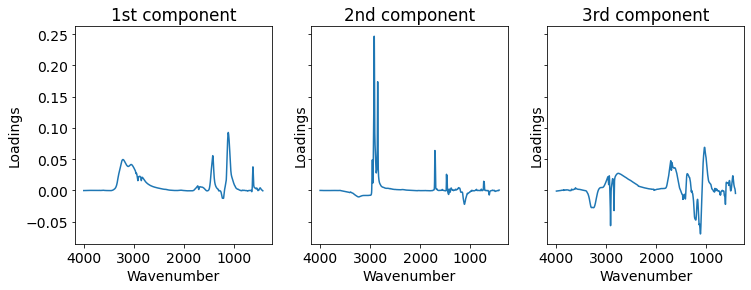

In [16]:
# Loadings of the 1st, 2nd and 3rd principal components 

P4_C1 = C4[:,0]
P4_C2 = C4[:,1]
P4_C3 = C4[:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))

ax1.plot(wavenb, P4_C1)
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Loadings')
ax1.set_title('1st component')
ax1.invert_xaxis()

ax2.plot(wavenb, P4_C2)
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Loadings')
ax2.set_title('2nd component')
ax2.invert_xaxis()

ax3.plot(wavenb, P4_C3)
ax3.set_xlabel('Wavenumber')
ax3.set_ylabel('Loadings')
ax3.set_title('3rd component')
ax3.invert_xaxis()

plt.show()

In [21]:
f.savefig('../outputs/Corrected/M4/M4_loadings.eps', dpi=100, bbox_inches = "tight")

## Number of non-zero Lasso coefficients q

In [17]:
model3 = Model(data_lab_train, data_lab_test, data_amb_train, data_amb_test, 'PCA', \
             venetian_blinds, nb_folds, True, True)
model4 = Model(data_lab_train, data_lab_test, data_amb_train, data_amb_test, 'PCA', \
             venetian_blinds, nb_folds, True, False)

n_comp = 10
alphas = np.logspace(-9, 2, n_comp)

q3_nnz = np.zeros((n_comp,1))
q4_nnz = np.zeros((n_comp,1))

for n in range(n_comp):
    alpha = alphas[n]
    _, _, _ = model3.compute_prediction(alpha)
    _, _, _ = model4.compute_prediction(alpha)
    
    q3 = model3.model[1].coef_
    q4 = model4.model[1].coef_
    
    q3_nnz[n] = np.count_nonzero(q3)
    q4_nnz[n] = np.count_nonzero(q4)
    

/home/louise/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.306725601074424, tolerance: 5.021281764592836
  model = cd_fast.enet_coordinate_descent(
/home/louise/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.445626242177132, tolerance: 5.021281764592836
  model = cd_fast.enet_coordinate_descent(


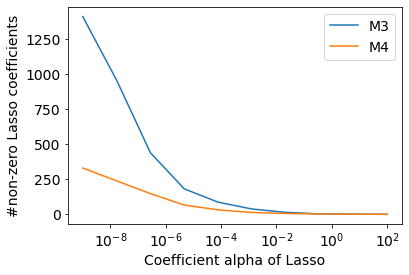

In [18]:
fig = plt.figure()
plt.plot(alphas, q3_nnz, label='M3')
plt.plot(alphas, q4_nnz, label='M4')
plt.legend()
plt.xlabel('Coefficient alpha of Lasso')
plt.ylabel('#non-zero Lasso coefficients')
plt.xscale('log')
plt.show()

In [20]:
fig.savefig('../outputs/Corrected/M4/M4_M3_nnz_q.eps', dpi=100, bbox_inches = "tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


## Coefficients b on the original variables

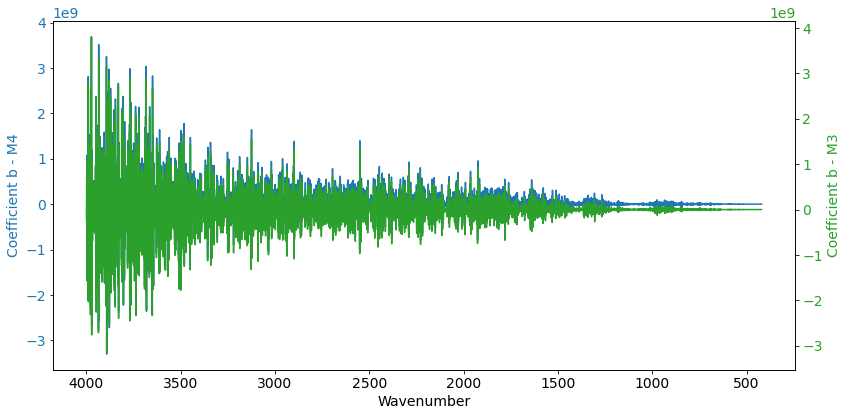

In [16]:
# Regression coeffcients b on the original variables

fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Coefficient b - M4', color=color)
ax1.plot(wavenb, b4, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_xaxis()

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Coefficient b - M3', color=color)
ax2.plot(wavenb, b3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

plt.show()

## Further analysis of the loadings

In [26]:
# spectrum of Ammonium Sulfate

DATA_FOLDER = "../data/"

DATA_LAB = DATA_FOLDER + "processed/data_lab.csv"

file_lab = pd.read_csv(INPUT_LAB, index_col="Unnamed: 0")
data_lab = pd.DataFrame(file_lab)

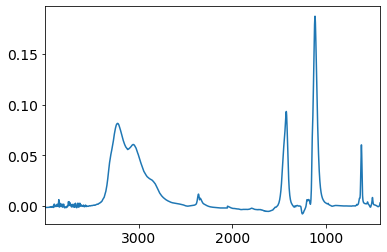

In [27]:
spectrum_AmmS = data_lab.loc[data_lab['Date'] == 1027]
spec_col = np.arange(1,2785,1).astype(str)
spectrum_AmmS = np.array(spectrum_AmmS[spec_col]).reshape((2784, 1))

# Graph of the laboratory spectrum Ammonium Sulfate
plt.plot(wavenb, spectrum_AmmS)
plt.xlim([wavenb[0].max(), wavenb[0].min()])
plt.show()

In [28]:
from numpy.linalg import norm
from sklearn.preprocessing import minmax_scale

minmax_spectrum_AmmS = minmax_scale(spectrum_AmmS)
dist = np.zeros((2784, 1))

for i in range(2784):
    # d = norm(minmax_scale(P3[:,i]) - minmax_spectrum_AmmS)
    d = norm(P3[:,i]/norm(P3[:,i]) - spectrum_AmmS/norm(spectrum_AmmS))
    dist[i] = d

Principal component closest to Amm Sulf :  0


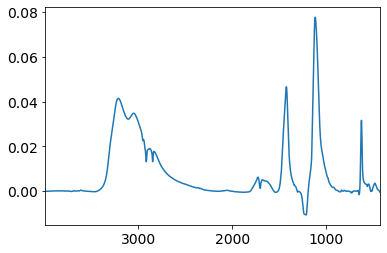

In [29]:
pc_AmmS = dist.argmin()
print("Principal component closest to Amm Sulf : ", pc_AmmS)

plt.plot(wavenb, P3[:,pc_AmmS])
plt.xlim([wavenb[0].max(), wavenb[0].min()])
plt.show()

In [32]:
dist = pd.DataFrame(data=dist, columns=['distance']).reset_index().sort_values(by='distance')